In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
%matplotlib inline

# Read the data

In [2]:
crime = pd.read_csv("Crime_Data_2010_2017.csv")

In [3]:
print("The shape of Crim Dataframe is {}".format(crime.shape))

The shape of Crim Dataframe is (1584316, 26)


In [4]:
crime.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location
0,1208575,03/14/2013,03/11/2013,1800,12,77th Street,1241,626,INTIMATE PARTNER - SIMPLE ASSAULT,0416 0446 1243 2000,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,626.0,NaN,NaN,NaN,6300 BRYNHURST AV,NaN,"(33.9829, -118.3338)"
1,102005556,01/25/2010,01/22/2010,2300,20,Olympic,2071,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,VAN NESS,15TH,"(34.0454, -118.3157)"
2,418,03/19/2013,03/18/2013,2030,18,Southeast,1823,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E 104TH ST,NaN,"(33.942, -118.2717)"
3,101822289,11/11/2010,11/10/2010,1800,18,Southeast,1803,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,88TH,WALL,"(33.9572, -118.2717)"
4,42104479,01/11/2014,01/04/2014,2300,21,Topanga,2133,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329,...,NaN,IC,Invest Cont,745.0,NaN,NaN,NaN,7200 CIRRUS WY,NaN,"(34.2009, -118.6369)"


# Data Cleaning

** The function Below standardize the Hour Format (Milatry Time) **

In [5]:
def convert_miletary_time(time):
    ntime = ""
    if len(str(time)) == 1:
        ntime = "000" + str(time)
    if len(str(time)) == 2:
        ntime = "00" + str(time)
    if len(str(time)) == 3:
        ntime = "0" + str(time)
    if len(str(time)) == 4:
        ntime = str(time)
    return ntime

def converthour(miltime):
    return miltime[:2]

In [6]:
crime["Time Occurred"] = crime["Time Occurred"].apply(convert_miletary_time)

In [7]:
crime['Time Occurred'].sample(10)

131708     2000
802524     1500
802320     1230
526623     2100
1296170    0350
477822     1315
60236      1100
1478929    2330
1293938    2030
681321     0001
Name: Time Occurred, dtype: object

** Convert the date reported and occurred to datetime format **

In [8]:
crime['Date Occurred'] = pd.to_datetime(crime['Date Occurred'], format="%m/%d/%Y")
crime['Date Reported'] = pd.to_datetime(crime['Date Reported'], format="%m/%d/%Y")

In [9]:
crime['Diff_Occ_Report'] = (crime['Date Reported'] - crime['Date Occurred']).dt.days

In [10]:
day_reported = [d.isoweekday() for d in crime["Date Reported"]]
mon_reported = [d.month for d in crime["Date Reported"]]
year_reported = [d.year for d in crime["Date Reported"]]
# Making new columns for each
crime["Day Reported"] = np.array(day_reported)
crime["Month Reported"] = np.array(mon_reported)
crime["Year Reported"] = np.array(year_reported)

In [11]:
day_occurred = [d.isoweekday() for d in crime["Date Occurred"]]
mon_occurred = [d.month for d in crime["Date Occurred"]]
year_occurred = [d.year for d in crime["Date Occurred"]]
# Making new columns for each
crime["Day Occurred"] = np.array(day_occurred)
crime["Month Occurred"] = np.array(mon_occurred)
crime["Year Occurred"] = np.array(year_occurred)

In [12]:
crime["Hour Occurred"] = crime["Time Occurred"].apply(converthour)

** Clean the lattitude and Longitude Columns **

In [13]:
lat = []
lon = []

# For each row in a varible,
for row in crime['Location ']:
    # Try to,
    try:
        # Split the row by comma and append
        # everything before the comma to lat
        lat.append(row.split(',')[0][1:])
        # Split the row by comma and append
        # everything after the comma to lon
        lon.append(row.split(',')[1][:-1])
    # But if you get an error
    except:
        # append a missing value to lat
        lat.append(np.NaN)
        # append a missing value to lon
        lon.append(np.NaN)
crime['latitude'] = lat
crime['longitude'] = lon

** Clean the MO codes data **

In [14]:
temp_MO_list = []
for i in temp_MO_list:
    for j in i:
        tempo_MO_list.append("MO "+j)
        
temp_MO_list = np.array(temp_MO_list)

pre_MO_df = [["","MO Codes"]]
for i in range(len(temp_MO_list)):
    pre_MO_df.append([i, temp_MO_list[i]])
    
pre_MO_data = np.array(pre_MO_df)

Final_MO_df = pd.DataFrame(data=pre_MO_data[1:,1:],
                  index=pre_MO_data[1:,0],
                  columns=pre_MO_data[0,1:])

** Save the Files **

In [15]:
Final_MO_df.to_csv("MO_Codes_From_Crime_Sorted.csv")

In [16]:
crime.to_csv("Cleaned_Crime_Data.csv")

In [17]:
crime = pd.read_csv("Cleaned_Crime_Data.csv")

In [18]:
crime.columns

Index(['Unnamed: 0', 'DR Number', 'Date Reported', 'Date Occurred',
       'Time Occurred', 'Area ID', 'Area Name', 'Reporting District',
       'Crime Code', 'Crime Code Description', 'MO Codes', 'Victim Age',
       'Victim Sex', 'Victim Descent', 'Premise Code', 'Premise Description',
       'Weapon Used Code', 'Weapon Description', 'Status Code',
       'Status Description', 'Crime Code 1', 'Crime Code 2', 'Crime Code 3',
       'Crime Code 4', 'Address', 'Cross Street', 'Location ',
       'Diff_Occ_Report', 'Day Reported', 'Month Reported', 'Year Reported',
       'Day Occurred', 'Month Occurred', 'Year Occurred', 'Hour Occurred',
       'latitude', 'longitude'],
      dtype='object')

** Visualizations **

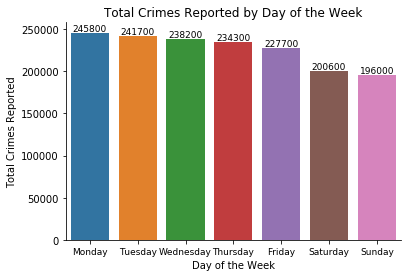

In [19]:
fig, ax = plt.subplots()
# Plotting crimes reported by day
sns.barplot(x=crime["Day Reported"].value_counts().index, y=crime["Day Reported"].value_counts())
# Axes
ax.set_title("Total Crimes Reported by Day of the Week")
ax.set_xticklabels(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], fontsize=9)
ax.set_xlabel("Day of the Week")
ax.set_ylabel("Total Crimes Reported")
# Adding values
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % round(int(p.get_height()), -2), 
            fontsize=9, color='black', ha='center', va='bottom')
sns.despine()

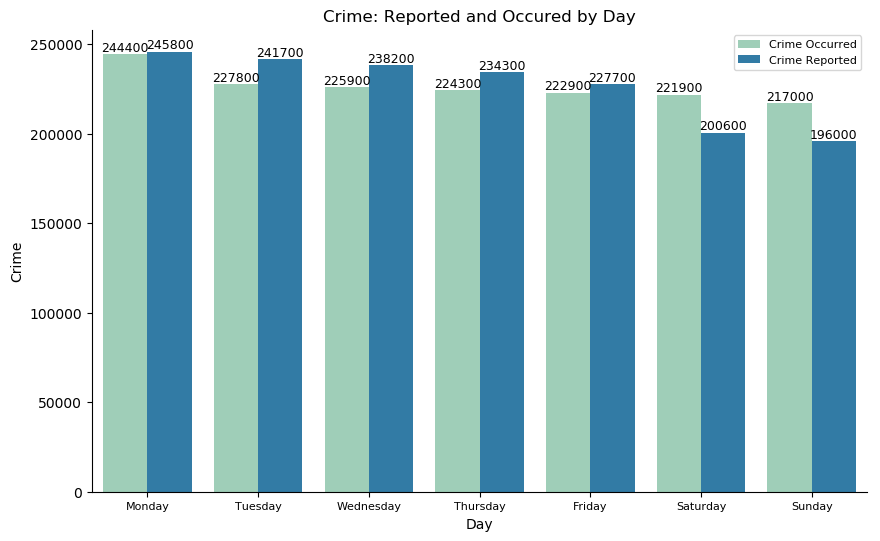

In [41]:
df1 = pd.DataFrame({
    "Day" : list(crime["Day Reported"].value_counts().index),
    "Crime Occurred" : list(crime["Day Occurred"].value_counts()),
    "Crime Reported" : list(crime["Day Reported"].value_counts())
})
dayrepocc = df1.set_index("Day").stack().reset_index().rename(columns={"level_1" : "Variable", 0 : "Crime"})
fig, ax = plt.subplots(figsize=(10,6))
plt.style.use('default')
# Plotting side by side crime rep and occ by day
sns.barplot(x = "Day", y = "Crime", hue = "Variable", data=dayrepocc, ax=ax ,palette='YlGnBu')
# Axes
ax.set_title("Crime: Reported and Occured by Day")
ax.set_xticklabels(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], fontsize=8)
ax.set_ylabel("Crime")
plt.legend(fontsize=8)
# Adding values
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % round(int(p.get_height()), -2), 
            fontsize=9, color='black', ha='center', va='bottom')
sns.despine(fig)
plt.savefig("Delta.png")

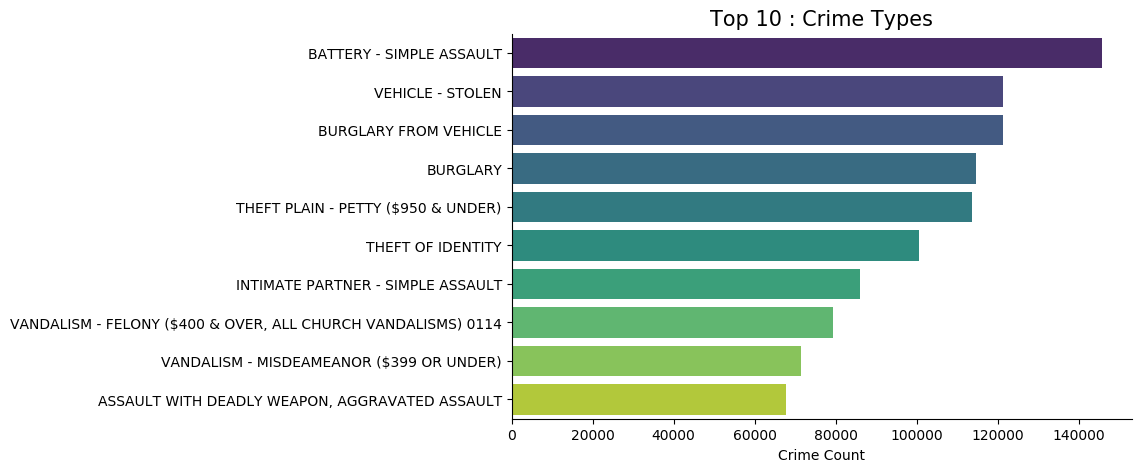

In [42]:
fig, ax = plt.subplots(figsize=(8,5))
# Plotting crimes by type
plt.style.use('default')   
sns.barplot(y=crime["Crime Code Description"].value_counts().index[0:10], 
                 x=crime["Crime Code Description"].value_counts().head(10), ax=ax,palette="viridis")
# Axes
ax.set_title("Top 10 : Crime Types",fontsize=15)
ax.set_xlabel("Crime Count")
#ax.set_ylabel("Crime Committed")
sns.despine(fig)
plt.savefig("Top10_Crime_Types")

C:\Users\iw267\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


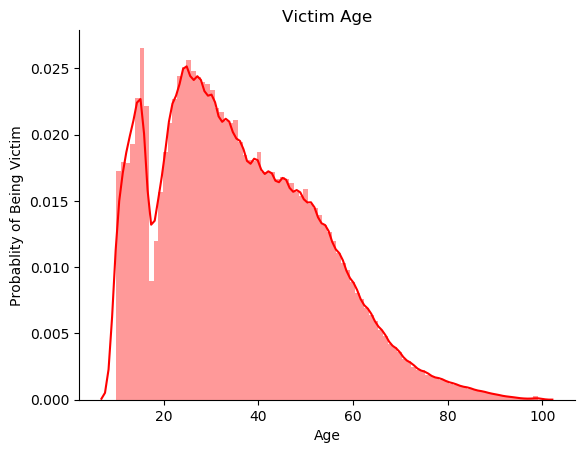

In [44]:
fig, ax = plt.subplots()
# Plotting victim's age distribution
plt.style.use('default')
sns.distplot(crime["Victim Age"].dropna(), bins=90, ax=ax,color='red')
# Axes
ax.set_title("Victim Age")
ax.set_xlabel("Age")
ax.set_ylabel("Probablity of Being Victim")
sns.despine()
plt.savefig("Victim_Age_Distplot")

In [23]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

In [24]:
crime_area = pd.DataFrame(crime.groupby('Area Name').size().sort_values(ascending=False).rename('counts').reset_index())
crime_area2 = crime_area.nlargest(columns='counts',n=10)

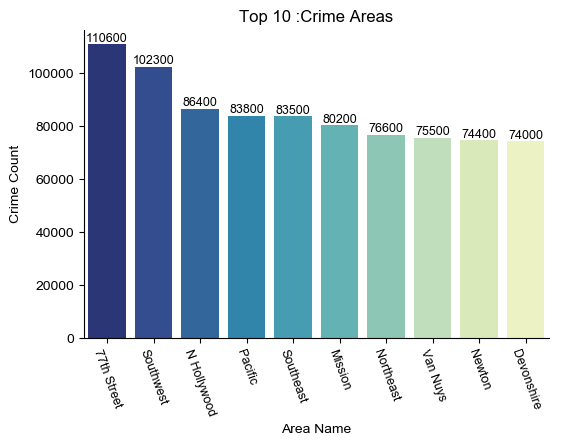

In [45]:
fig, ax = plt.subplots(figsize=(6,4))
# Plotting crimes by type
sns.set(style='white')
sns.barplot(y=crime_area2['counts'], 
                 x=crime_area2["Area Name"],ax=ax,palette='YlGnBu_r')
# Axes
ax.set_title("Top 10 :Crime Areas")
plt.xticks(rotation=-70,fontsize=9)
ax.set_ylabel("Crime Count")
#ax.set_xlabel("Area",fontsize=10)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % round(int(p.get_height()), -2), 
            fontsize=9, color='black', ha='center', va='bottom')
sns.despine(fig)
plt.savefig("Top10_Crime_Areas")

In [46]:
crime["Victim Gender"] = crime["Victim Sex"][crime["Victim Sex"] != "X"]
crime["Victim Gender"] = crime["Victim Gender"][crime["Victim Gender"] != "H"]
crime["Victim Gender"] = crime["Victim Gender"][crime["Victim Gender"] != "-"]

In [47]:
cc_vg = crime[["Crime Code Description", "Victim Gender"]]

In [48]:
# Dropping null values
cc_vg = cc_vg[pd.notnull(cc_vg["Victim Gender"])]

In [49]:
# Saving top 10 crimes
crimetop10 = cc_vg["Crime Code Description"].value_counts().head(10).index
# Choosing data that is included in the top 10 crimes (by selection)
crimecc = cc_vg.loc[cc_vg["Crime Code Description"].isin(crimetop10)]

<Figure size 1500x1500 with 0 Axes>

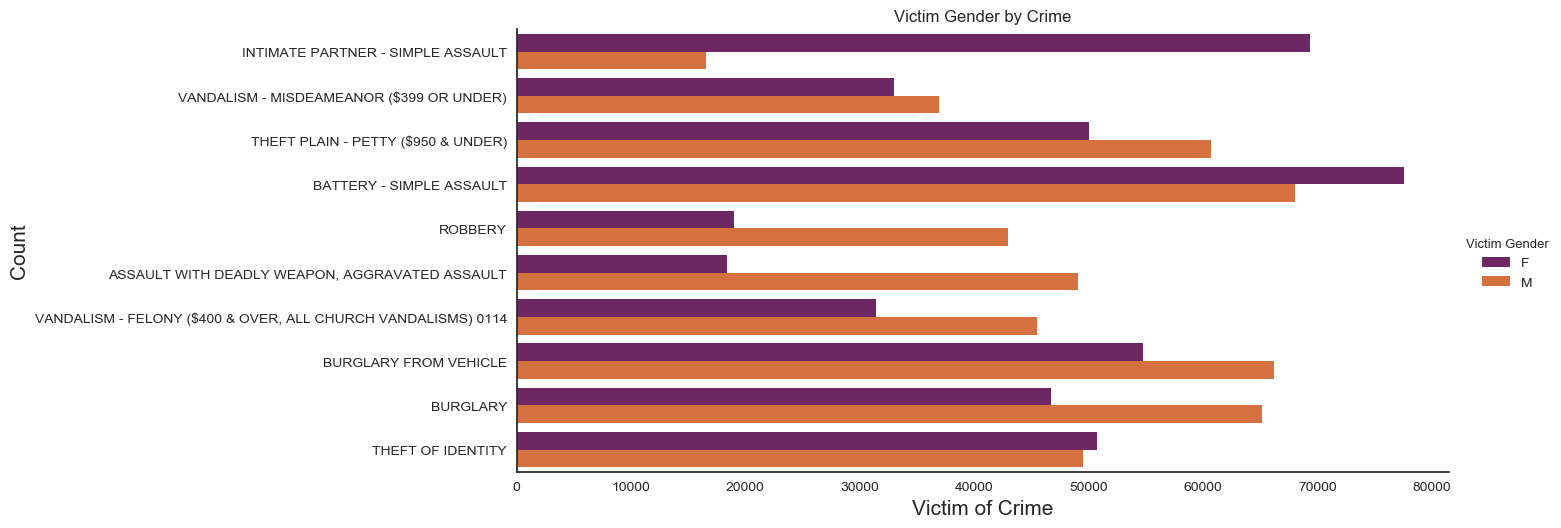

In [57]:
plt.figure(figsize=(15,15))
ax = sns.factorplot(y="Crime Code Description", hue="Victim Gender", kind="count", data=crimecc, size=5, aspect=3, 
                    palette='inferno')
# Axes
plt.title("Victim Gender by Crime")
#ax.set_xticklabels(rotation=-90)
ax.set_xlabels("Victim of Crime",fontsize=15)
ax.set_ylabels("Count",fontsize=15)
sns.despine()
plt.savefig("Crime_By_Victim_Gender")

In [31]:
crimes_from_15 = crime[(crime['Date Occurred'] >= '01/01/2015')]
#print(crimes_from_15.shape)
#crimes_from_15.tail()
gr_count = crimes_from_15.groupby(['Crime Code Description'], as_index=['Crime Code Description']).count().iloc[:, 1]
#gr_count
selected_crimes_from_15 = gr_count[gr_count > 20000]

In [32]:
selected_names = selected_crimes_from_15.index
print("\n".join(selected_names))

ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT
BATTERY - SIMPLE ASSAULT
BURGLARY
BURGLARY FROM VEHICLE
CRIMINAL THREATS - NO WEAPON DISPLAYED
INTIMATE PARTNER - SIMPLE ASSAULT
ROBBERY
SHOPLIFTING - PETTY THEFT ($950 & UNDER)
THEFT FROM MOTOR VEHICLE - GRAND ($400 AND OVER)
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)
THEFT OF IDENTITY
THEFT PLAIN - PETTY ($950 & UNDER)
THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD0036
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS) 0114
VANDALISM - MISDEAMEANOR ($399 OR UNDER)
VEHICLE - STOLEN


In [33]:
crimes_time_series = crimes_from_15.groupby(['Crime Code Description', 'Date Occurred'], as_index=['Crime Code Description', 'Date Occurred']).count().iloc[:,1].unstack(level=0).unstack(level=0).fillna(0)

In [34]:
xticks=['DEADLY WEAPON','BATTERY ASSAULT','BURGLARY','BURGLARY VEHICLE','THREATS NO WEAPON','INTIMATE ASSAULT','ROBBERY','SHOPLIFTING'
,'THEFT GRAND','THEFT PETTY','THEFT OF IDENTITY','THEFT PLAIN','THEFT-GRAND','VANDALISM FELONY','VANDALISM MISDEAMEANOR','VEHICLE STOLEN']
yticks =['DEADLY WEAPON','BATTERY ASSAULT','BURGLARY','BURGLARY VEHICLE','THREATS NO WEAPON','INTIMATE ASSAULT','ROBBERY','SHOPLIFTING'
,'THEFT GRAND','THEFT PETTY','THEFT OF IDENTITY','THEFT PLAIN','THEFT-GRAND','VANDALISM FELONY','VANDALISM MISDEAMEANOR','VEHICLE STOLEN']

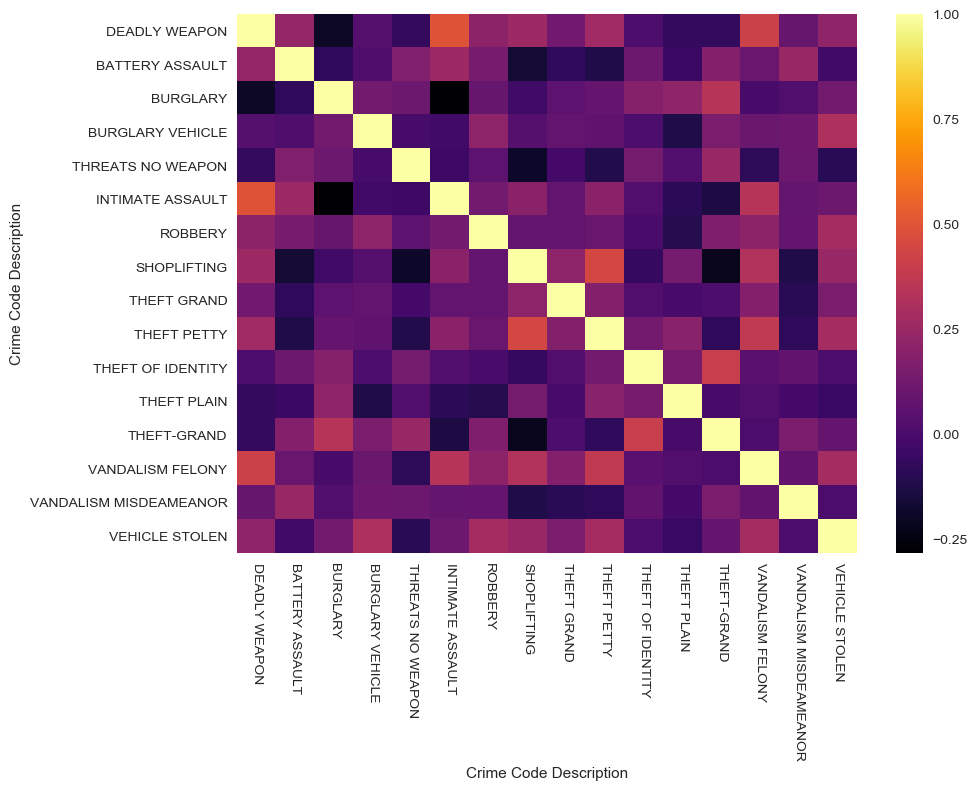

In [58]:
correlation_matrix = crimes_time_series.unstack(0)[selected_names].corr()
plt.figure(figsize=(10,7))
sns.heatmap(correlation_matrix,xticklabels=xticks,yticklabels=yticks,cmap='inferno')
sns.set(font_scale=1)
plt.xticks(rotation=-90)
plt.savefig("Confusion_Matrix")

In [36]:
import wordcloud
from collections import Counter

premises_descs = crime["Premise Description"]
premises_descs.dropna(inplace = True)
premise_descs_cnt = Counter(premises_descs.tolist())
premise = premise_descs_cnt.most_common(20)

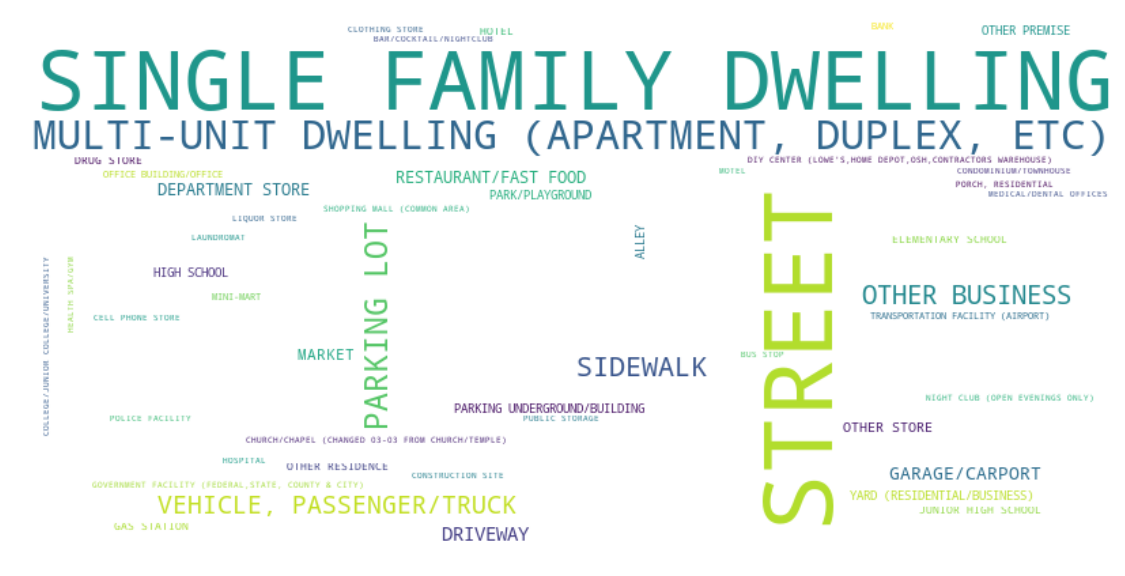

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline
limit=50
wc = wordcloud.WordCloud(width=800, height=400,background_color="white",min_font_size=1,max_font_size=70,max_words=limit)
wc.generate_from_frequencies(premise_descs_cnt)

plt.figure(figsize=(20,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.savefig("Top_Premises")

In [38]:
import matplotlib.image as mpimg
plt.figure(figsize=(20,12))
img = mpimg.imread('Top_Weapons.png')
plt.imshow(img)

FileNotFoundError: [Errno 2] No such file or directory: 'Top_Weapons.png'

<Figure size 1440x864 with 0 Axes>

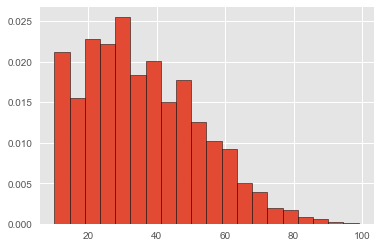

In [61]:
plt.style.use('ggplot')
crime['Victim Age'].hist(bins=20,ec='black',density=True)

In [ ]:
import matplotlib.image as mpimg
plt.figure(figsize=(20,12))
img = mpimg.imread('Victim_Age_Historgram.png')
plt.imshow(img)